<a href="https://colab.research.google.com/github/mtidiwala/Autism/blob/main/Feature_Engineering_%26_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Autism_Screening/Datasets/

Mounted at /content/drive
/content/drive/My Drive/Autism_Screening/Datasets


**Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Feature Selction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
url="https://raw.githubusercontent.com/mtidiwala/Autism/main/dataset/New_Toddler_Autism_Dataset.csv" 
df_data_enc=pd.read_csv(url)

In [6]:
df_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Case_No                 1054 non-null   int64
 1   A1                      1054 non-null   int64
 2   A2                      1054 non-null   int64
 3   A3                      1054 non-null   int64
 4   A4                      1054 non-null   int64
 5   A5                      1054 non-null   int64
 6   A6                      1054 non-null   int64
 7   A7                      1054 non-null   int64
 8   A8                      1054 non-null   int64
 9   A9                      1054 non-null   int64
 10  A10                     1054 non-null   int64
 11  Age_Mons                1054 non-null   int64
 12  Qchat_10_Score          1054 non-null   int64
 13  Sex                     1054 non-null   int64
 14  Ethnicity               1054 non-null   int64
 15  Jaundice             

**Plotting the Pearson's correlation matrix (HeatMap)**

**Interpreting the Heatmap of Correlation**

The features in Light Orange colour shows high correlation, we can see all the 10 answers from A1 to A9 except A10 (0.29) are highly correlated with Qchart_10_score. Therefore, it is better to remove the Qchart_10_score coloumn from our feature list as it is highly correlated and mislead our results.


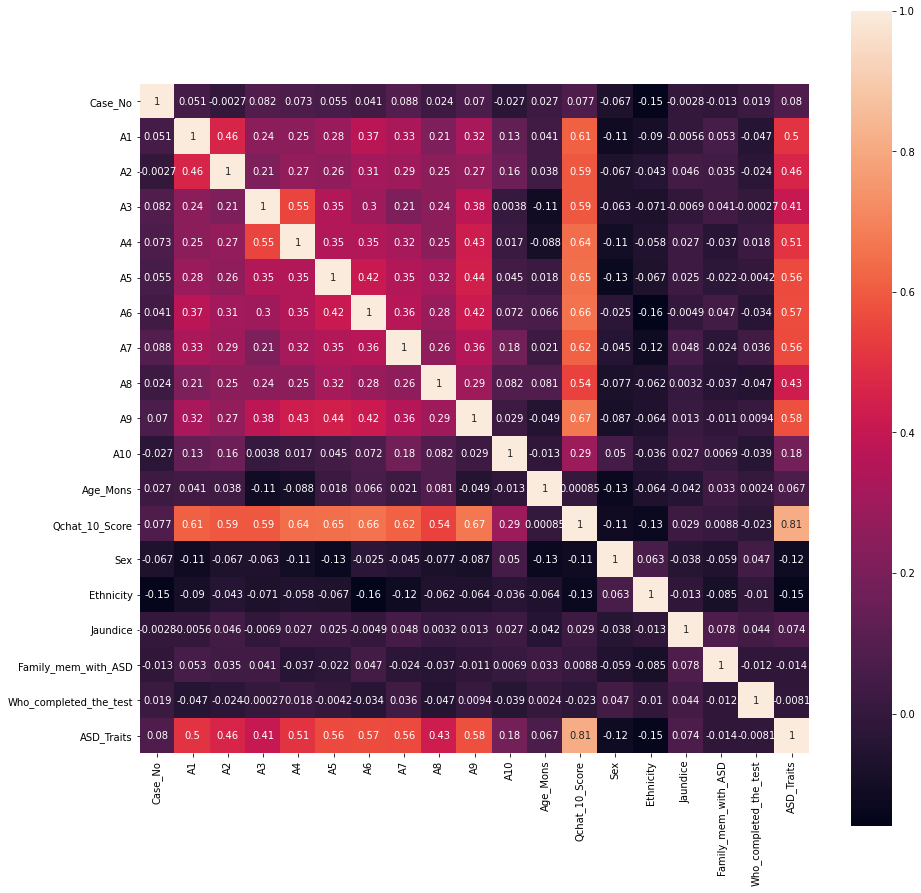

In [7]:
corr = df_data_enc.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)


**Selecting strong correlation pairs (magnitude greater than 0.5)**

In [8]:
correlation_mat = df_data_enc.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)


ASD_Traits              A1                        0.503810
A1                      ASD_Traits                0.503810
A4                      ASD_Traits                0.505204
ASD_Traits              A4                        0.505204
Qchat_10_Score          A8                        0.543229
A8                      Qchat_10_Score            0.543229
A4                      A3                        0.547100
A3                      A4                        0.547100
ASD_Traits              A7                        0.563177
A7                      ASD_Traits                0.563177
A5                      ASD_Traits                0.563297
ASD_Traits              A5                        0.563297
                        A6                        0.569424
A6                      ASD_Traits                0.569424
ASD_Traits              A9                        0.577336
A9                      ASD_Traits                0.577336
Qchat_10_Score          A2                        0.5924

**Remove the Columns which are not required in Analysis**

Removing column - Case_No column as it is weakly correlated and not providing any significance in the prediction

In [9]:
df_data_enc.drop(['Case_No','Qchat_10_Score'], axis = 1, inplace = True)

In [10]:
df_data_enc.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who_completed_the_test', 'ASD_Traits'],
      dtype='object')

**Spliting the data into Training & Testing with Test Size = 33%**

In [11]:
X = df_data_enc.drop(['ASD_Traits'], axis = 1)
y = df_data_enc['ASD_Traits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
X.isnull().sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      1054 non-null   int64
 1   A2                      1054 non-null   int64
 2   A3                      1054 non-null   int64
 3   A4                      1054 non-null   int64
 4   A5                      1054 non-null   int64
 5   A6                      1054 non-null   int64
 6   A7                      1054 non-null   int64
 7   A8                      1054 non-null   int64
 8   A9                      1054 non-null   int64
 9   A10                     1054 non-null   int64
 10  Age_Mons                1054 non-null   int64
 11  Sex                     1054 non-null   int64
 12  Ethnicity               1054 non-null   int64
 13  Jaundice                1054 non-null   int64
 14  Family_mem_with_ASD     1054 non-null   int64
 15  Who_completed_the_tes

In [12]:
# summarize
print('Training Dataset', X_train.shape, y_train.shape)
print('Testing Dataset', X_test.shape, y_test.shape)

Training Dataset (706, 16) (706,)
Testing Dataset (348, 16) (348,)


**Exporting Training and Testing Datsets**

In [15]:
X_train.to_csv("Toddler_Autism_Training_Dataset.csv")
!cp Toddler_Autism_Training_Dataset.csv "/content/drive/My Drive/Autism_Screening/Datasets/"

X_test.to_csv("Toddler_Autism_Testing_Dataset.csv")
!cp Toddler_Autism_Testing_Dataset.csv "/content/drive/My Drive/Autism_Screening/Datasets/"

cp: 'Toddler_Autism_Training_Dataset.csv' and '/content/drive/My Drive/Autism_Screening/Datasets/Toddler_Autism_Training_Dataset.csv' are the same file
cp: 'Toddler_Autism_Testing_Dataset.csv' and '/content/drive/My Drive/Autism_Screening/Datasets/Toddler_Autism_Testing_Dataset.csv' are the same file


**Load Training Dataset**

In [18]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test
594,0,1,1,1,1,1,1,1,1,0,36,0,7,0,0,3
307,1,1,1,1,1,1,1,1,1,1,33,0,6,1,0,3
913,0,0,0,0,0,0,0,0,1,0,24,0,6,0,0,3
134,1,1,0,0,1,0,0,1,0,0,33,1,10,1,1,3
33,0,0,0,0,0,0,0,0,0,0,12,1,8,0,0,3


In [ ]:
#from pandas import DataFrame
#X_train_Df = DataFrame(X_train)
#X_test_Df = DataFrame(X_test)

**Oversampling the Training Dataset using SMOTE**

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

#Oversampling the Training Datset using SMOTE
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)


Before Counter({1: 473, 0: 233})
After Counter({1: 473, 0: 473})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
from pandas import DataFrame
X_train_sm_df = DataFrame(X_train_sm)

In [24]:
X_train_sm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,1,1,1,1,1,1,1,0,36,0,7,0,0,3
1,1,1,1,1,1,1,1,1,1,1,33,0,6,1,0,3
2,0,0,0,0,0,0,0,0,1,0,24,0,6,0,0,3
3,1,1,0,0,1,0,0,1,0,0,33,1,10,1,1,3
4,0,0,0,0,0,0,0,0,0,0,12,1,8,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0,0,0,1,0,0,0,0,0,0,30,0,8,1,0,3
942,0,0,0,0,0,0,0,0,0,1,14,0,5,0,0,3
943,0,0,0,0,0,0,0,0,0,1,36,1,5,0,0,2
944,0,0,0,0,0,0,0,0,0,0,12,0,5,0,0,3


# **Random Forest Classifier**

In [27]:
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test
339,1,0,1,1,1,1,1,1,1,1,36,0,1,0,0,3
248,1,1,1,1,1,1,1,1,1,1,18,0,5,1,0,3
664,0,0,0,0,0,1,0,0,0,1,30,0,6,0,0,3
310,0,0,0,0,1,1,1,1,1,1,36,0,5,0,0,3
85,0,0,0,1,1,1,0,0,1,1,23,0,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1,0,0,0,0,0,1,1,0,0,36,0,5,0,0,3
718,1,1,0,0,0,0,0,0,0,0,17,0,6,0,0,3
688,1,0,1,0,1,0,1,1,0,1,24,0,5,0,0,3
901,0,0,1,1,1,0,1,0,1,0,36,1,10,0,0,3


In [28]:
# fit the model
#model = RandomForestClassifier(random_state=1)
#model.fit(X_train_sm_df, y_train_sm)

# make predictions
#yhat = model.predict(X_test)

# evaluate predictions
#acc = accuracy_score(y_test, yhat)
#print('Accuracy: %.3f' % acc)

Accuracy: 0.974


In [32]:
params = {'max_depth': np.arange(1, 11), 'n_estimators': np.arange(100, 1100, 100)}

# fit the model and Run StratifiedKFold K = 5
model = RandomForestClassifier(random_state=1)
skf = StratifiedKFold(n_splits = 2, shuffle = True, random_state=1)
model_forest = GridSearchCV(estimator=model, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

model_forest.fit(X_train_sm_df, y_train_sm)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [40]:
#print(model_forest.best_params_)
#print(model_forest.best_estimator_)
print('Model_Score', model_forest.best_score_)

Model_Score 0.9651162790697674


In [48]:
# evaluate predictions
acc = accuracy_score(y_test, model_forest.predict(X_test))
print('Accuracy: %.3f' % acc)

Accuracy: 0.983
